In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
sns.set()
sns.set_context('talk')
sns.set_theme(style = 'whitegrid')
import matplotlib.pyplot as plt
from itertools import product

In [2]:
df = pd.read_csv('main_data.csv')
df.head()

,Unnamed: 0,country,year,protest,protesterviolence,protest_time,reasons_removal,reasons_political,reasons_policebrutality,reasons_other,reasons_land,reasons_price,reasons_labor,reasons_social,responses_crowd_dispersal,responses_killings,responses_arrests,responses_beatings,responses_ignore,responses_shootings,responses_accomodation,responses_other,violent_response,success,violence_both,violent_protest_time
0,13647,Afghanistan,1990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13648,Afghanistan,1991,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,13649,Afghanistan,1992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13650,Afghanistan,1993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13651,Afghanistan,1994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df_clean = df[['protest', 'protesterviolence', 'reasons_labor', 'reasons_social', 'reasons_land', 'reasons_removal',
         'reasons_political', 'reasons_price', 'reasons_policebrutality']]
df_clean.head()

,protest,protesterviolence,reasons_labor,reasons_social,reasons_land,reasons_removal,reasons_political,reasons_price,reasons_policebrutality
0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


In [4]:
# Creating list for iterable and names for new df
reasons = ['reasons_labor', 'reasons_social', 'reasons_land', 'reasons_removal', 'reasons_political',
           'reasons_price', 'reasons_policebrutality']
# Initializing empty df
df_temp = pd.DataFrame()

In [5]:
# Calculates the total protests and total violent protests for each reason
for reason in reasons:
    df_temp[reason + '_total'] = [sum(df_clean[reason])]
    df_temp['violent_' + reason] = [sum(df_clean['protesterviolence'] & df_clean[reason] > 0)]
    
df_temp.head()

,reasons_labor_total,violent_reasons_labor,reasons_social_total,violent_reasons_social,reasons_land_total,violent_reasons_land,reasons_removal_total,violent_reasons_removal,reasons_political_total,violent_reasons_political,reasons_price_total,violent_reasons_price,reasons_policebrutality_total,violent_reasons_policebrutality
0,2211,518,684,103,582,165,1889,550,10750,2807,1414,474,1101,452


In [6]:
# Formatting
df_reasons = pd.DataFrame(columns = ['Reason', 'Total Protests', 'Violent Protests'])
df_reasons['Reason'] = ['Labor', 'Social', 'Land', 'Removal', 'Political', 'Price', 'Police Brutality']
df_reasons['Total Protests'] = [2211, 684, 582, 1889, 10750, 1414, 1101]
df_reasons['Violent Protests'] = [518, 103, 165, 550, 2807, 474, 452]
df_reasons['Nonviolent Protests'] = df_reasons['Total Protests'] - df_reasons['Violent Protests']
df_reasons

,Reason,Total Protests,Violent Protests,Nonviolent Protests
0,Labor,2211,518,1693
1,Social,684,103,581
2,Land,582,165,417
3,Removal,1889,550,1339
4,Political,10750,2807,7943
5,Price,1414,474,940
6,Police Brutality,1101,452,649


In [7]:
# Calculates the percentage for violent and nonviolent protests
for i in df_reasons.iterrows():
    df_reasons['Violent'] = round((df_reasons['Violent Protests']/df_reasons['Total Protests'])*100)
    df_reasons['Nonviolent'] = round((df_reasons['Nonviolent Protests']/df_reasons['Total Protests'])*100)
df_reasons.head()

,Reason,Total Protests,Violent Protests,Nonviolent Protests,Violent,Nonviolent
0,Labor,2211,518,1693,23.0,77.0
1,Social,684,103,581,15.0,85.0
2,Land,582,165,417,28.0,72.0
3,Removal,1889,550,1339,29.0,71.0
4,Political,10750,2807,7943,26.0,74.0


In [8]:
# Setup for first plot
temp = df_reasons[['Reason', 'Nonviolent Protests', 'Violent Protests']]
melted = pd.melt(temp, id_vars='Reason').rename(columns = str.title)
melted = melted.sort_values(['Value','Variable'])
melted

,Reason,Variable,Value
8,Social,Violent Protests,103
9,Land,Violent Protests,165
2,Land,Nonviolent Protests,417
13,Police Brutality,Violent Protests,452
12,Price,Violent Protests,474
7,Labor,Violent Protests,518
10,Removal,Violent Protests,550
1,Social,Nonviolent Protests,581
6,Police Brutality,Nonviolent Protests,649
5,Price,Nonviolent Protests,940


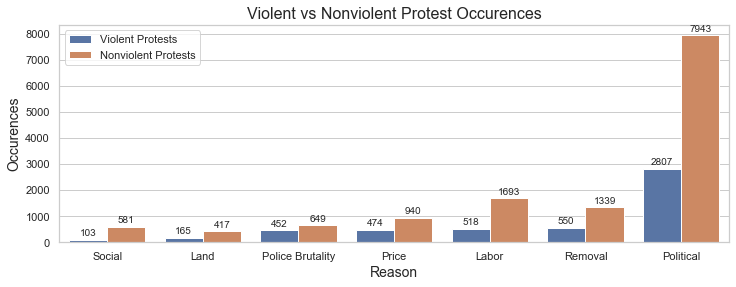

In [9]:
# Plotting dimensions
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
violence_plot = sns.barplot(x = 'Reason', y = 'Value', hue = 'Variable', data = melted, ax = ax)

for p in violence_plot.patches:
    height = int(p.get_height())
    ax.annotate('{}'.format(height), xy = (p.get_x() + p.get_width() / 2, height), xytext = (0, 2), 
                textcoords = 'offset points', ha = 'center', va = 'bottom')
                           
plt.gca().legend().set_title('')
plt.xlabel('Reason', size = 14)
plt.ylabel('Occurences', size = 14)
plt.title('Violent vs Nonviolent Protest Occurences', size = 16)

None

In [10]:
# Setup for second plot
temp2 = df_reasons[['Reason', 'Nonviolent', 'Violent']]
melted2 = pd.melt(temp2, id_vars='Reason', value_name = 'Percentage').rename(columns = str.title)
melted2 = melted2.sort_values(['Percentage','Variable'])
melted2

,Reason,Variable,Percentage
8,Social,Violent,15.0
7,Labor,Violent,23.0
11,Political,Violent,26.0
9,Land,Violent,28.0
10,Removal,Violent,29.0
12,Price,Violent,34.0
13,Police Brutality,Violent,41.0
6,Police Brutality,Nonviolent,59.0
5,Price,Nonviolent,66.0
3,Removal,Nonviolent,71.0


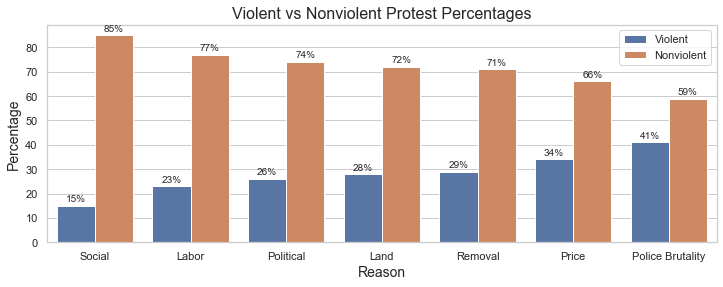

In [11]:
# Plotting dimensions
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting
violence_plot = sns.barplot(x = 'Reason', y = 'Percentage', hue = 'Variable', data = melted2, ax = ax)

for p in violence_plot.patches:
    height = int(p.get_height())
    ax.annotate('{}'.format(height) + '%', xy = (p.get_x() + p.get_width() / 2, height), xytext = (0, 2), 
                textcoords = 'offset points', ha = 'center', va = 'bottom')
                           
plt.gca().legend().set_title('')
plt.xlabel('Reason', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Violent vs Nonviolent Protest Percentages', size = 16)


None